In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
homicidios_hechos=pd.read_csv('Data\Limpia\homicidios_hechos.csv')
homicidios_victimas=pd.read_csv('Data\Limpia\homicidios_victimas.csv')
comunas=pd.read_csv('Data\Limpia\comunas.csv')

In [41]:
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,SEMESTRE,ANIO_SEMESTRE,MM,DD,ASPO,HORA,...,CALLE,CRUCE,DIRECCION_NORMALIZADA,COMUNA,XY (CABA),LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,2016_1,1,1,ANTES,04:00:00,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2016_1,1,2,ANTES,01:15:00,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,2016_1,1,3,ANTES,07:00:00,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,2016_1,1,10,ANTES,00:00:00,...,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,2016_1,1,21,ANTES,05:20:00,...,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,2021_2,12,13,DESPUES,17:10:00,...,RIESTRA AV.,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,2021_2,12,20,DESPUES,01:10:00,...,"DELLEPIANE, LUIS, TTE. GRAL.",LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,2021_2,12,30,DESPUES,00:43:00,...,GAONA AV.,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,2021_2,12,15,DESPUES,10:30:00,...,"PERON, EVA AV.",NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


In [42]:
homicidios_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'SEMESTRE', 'ANIO_SEMESTRE', 'MM',
       'DD', 'ASPO', 'HORA', 'HH', 'DIA', 'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE',
       'CALLE', 'CRUCE', 'DIRECCION_NORMALIZADA', 'COMUNA', 'XY (CABA)',
       'LONGITUD', 'LATITUD', 'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [43]:
homicidios_hechos.drop(['ANIO_SEMESTRE', 'HORA', 'LUGAR_DEL_HECHO', 'CALLE',
       'CRUCE', 'DIRECCION_NORMALIZADA','XY (CABA)'], axis=1, inplace=True)

In [44]:
homicidios_victimas

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01,JOVENES
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02,A_MAYORES
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03,ADULTOS
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,2016-01-10,JOVENES
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01,JOVENES
...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50.0,2021-12-12,ADULTOS
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18.0,2021-12-18,JOVENES
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43.0,2021-12-20,ADULTOS
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27.0,2022-01-02,JOVENES


In [45]:
homicidios_victimas.columns

Index(['ID', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'RANGO_ETARIO'],
      dtype='object')

In [46]:
homicidios_victimas.drop(['FECHA', 'AAAA', 'MM', 'DD', 'VICTIMA'], axis=1, inplace=True)


In [47]:
homicidios_victimas

,ID,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01,JOVENES
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02,A_MAYORES
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03,ADULTOS
3,2016-0004,CONDUCTOR,MASCULINO,18.0,2016-01-10,JOVENES
4,2016-0005,CONDUCTOR,MASCULINO,29.0,2016-02-01,JOVENES
...,...,...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50.0,2021-12-12,ADULTOS
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-18,JOVENES
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20,ADULTOS
715,2021-0095,CONDUCTOR,MASCULINO,27.0,2022-01-02,JOVENES


In [48]:
df = pd.merge(homicidios_hechos, homicidios_victimas, on='ID', how='inner')

In [49]:
df

,ID,N_VICTIMAS,FECHA,AAAA,SEMESTRE,MM,DD,ASPO,HH,DIA,...,LONGITUD,LATITUD,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO
0,2016-0001,1,2016-01-01,2016,1,1,1,ANTES,4.0,VIERNES,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,2016-01-01,JOVENES
1,2016-0002,1,2016-01-02,2016,1,1,2,ANTES,1.0,SABADO,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,2016-01-02,A_MAYORES
2,2016-0003,1,2016-01-03,2016,1,1,3,ANTES,7.0,DOMINGO,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,2016-01-03,ADULTOS
3,2016-0004,1,2016-01-10,2016,1,1,10,ANTES,0.0,DOMINGO,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18.0,2016-01-10,JOVENES
4,2016-0005,1,2016-01-21,2016,1,1,21,ANTES,5.0,JUEVES,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29.0,2016-02-01,JOVENES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,12,13,DESPUES,17.0,LUNES,...,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-18,JOVENES
713,2021-0094,1,2021-12-20,2021,12,12,20,DESPUES,1.0,LUNES,...,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20,ADULTOS
714,2021-0095,1,2021-12-30,2021,12,12,30,DESPUES,0.0,JUEVES,...,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27.0,2022-01-02,JOVENES
715,2021-0096,1,2021-12-15,2021,12,12,15,DESPUES,10.0,MIERCOLES,...,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60.0,2021-12-20,ADULTOS


In [50]:
df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'SEMESTRE', 'MM', 'DD', 'ASPO',
       'HH', 'DIA', 'TIPO_DE_CALLE', 'COMUNA', 'LONGITUD', 'LATITUD',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'RANGO_ETARIO'],
      dtype='object')

In [51]:
comunas

,COMUNA,BARRIOS,AREA
0,2,RECOLETA,6.317265e+06
1,5,ALMAGRO - BOEDO,6.660603e+06
2,6,CABALLITO,6.851029e+06
3,7,FLORES - PARQUE CHACABUCO,1.242290e+07
4,9,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07
5,10,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...,1.265656e+07
6,11,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,1.412004e+07
7,12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,1.557093e+07
8,14,PALERMO,1.584587e+07
9,3,BALVANERA - SAN CRISTOBAL,6.385991e+06


In [52]:
df = pd.merge(df, comunas, on='COMUNA', how='left')

In [53]:
df

,ID,N_VICTIMAS,FECHA,AAAA,SEMESTRE,MM,DD,ASPO,HH,DIA,...,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO,BARRIOS,AREA
0,2016-0001,1,2016-01-01,2016,1,1,1,ANTES,4.0,VIERNES,...,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,2016-01-01,JOVENES,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,2.221690e+07
1,2016-0002,1,2016-01-02,2016,1,1,2,ANTES,1.0,SABADO,...,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,2016-01-02,A_MAYORES,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07
2,2016-0003,1,2016-01-03,2016,1,1,3,ANTES,7.0,DOMINGO,...,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,2016-01-03,ADULTOS,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
3,2016-0004,1,2016-01-10,2016,1,1,10,ANTES,0.0,DOMINGO,...,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18.0,2016-01-10,JOVENES,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,2.221690e+07
4,2016-0005,1,2016-01-21,2016,1,1,21,ANTES,5.0,JUEVES,...,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29.0,2016-02-01,JOVENES,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,12,13,DESPUES,17.0,LUNES,...,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-18,JOVENES,FLORES - PARQUE CHACABUCO,1.242290e+07
713,2021-0094,1,2021-12-20,2021,12,12,20,DESPUES,1.0,LUNES,...,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20,ADULTOS,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07
714,2021-0095,1,2021-12-30,2021,12,12,30,DESPUES,0.0,JUEVES,...,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27.0,2022-01-02,JOVENES,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,1.412004e+07
715,2021-0096,1,2021-12-15,2021,12,12,15,DESPUES,10.0,MIERCOLES,...,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60.0,2021-12-20,ADULTOS,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07


In [54]:
df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'SEMESTRE', 'MM', 'DD', 'ASPO',
       'HH', 'DIA', 'TIPO_DE_CALLE', 'COMUNA', 'LONGITUD', 'LATITUD',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'RANGO_ETARIO', 'BARRIOS', 'AREA'],
      dtype='object')

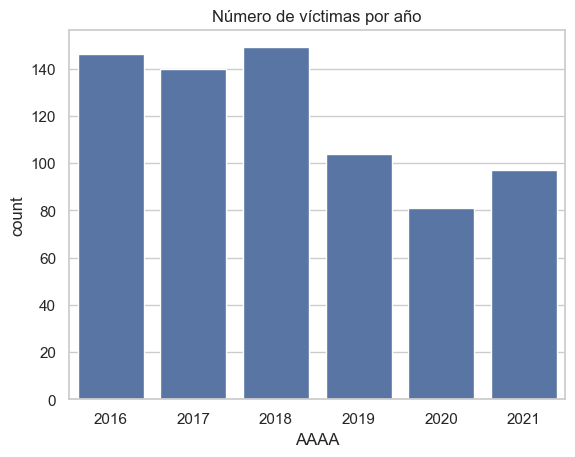

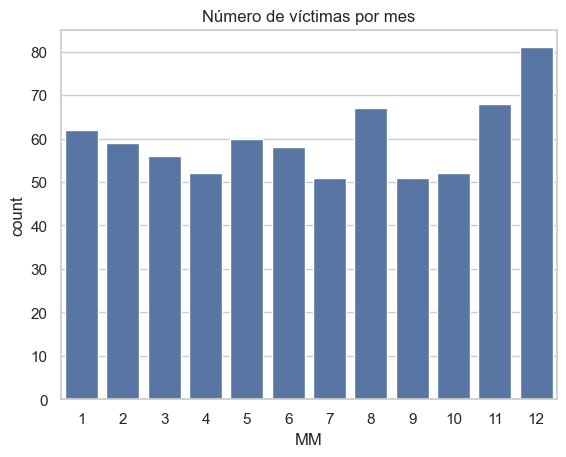

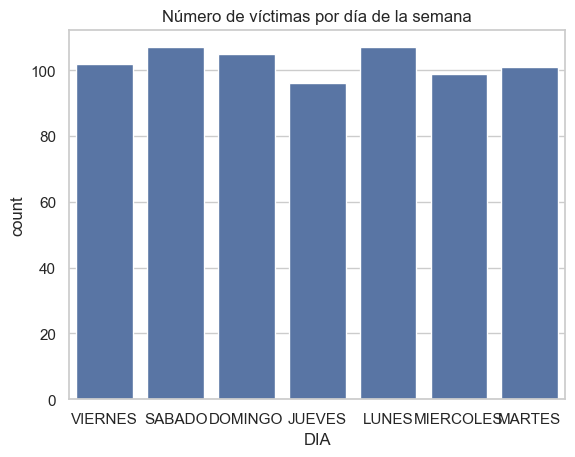

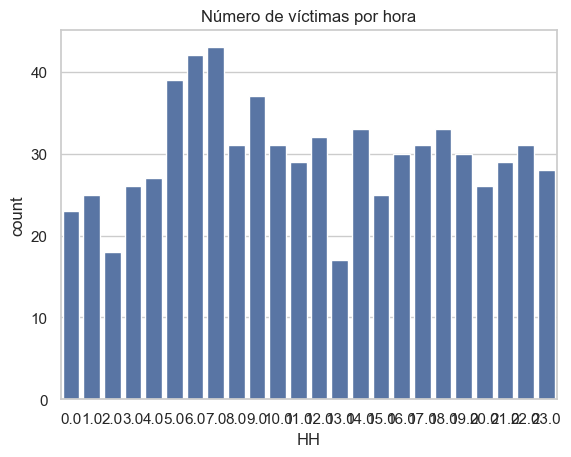

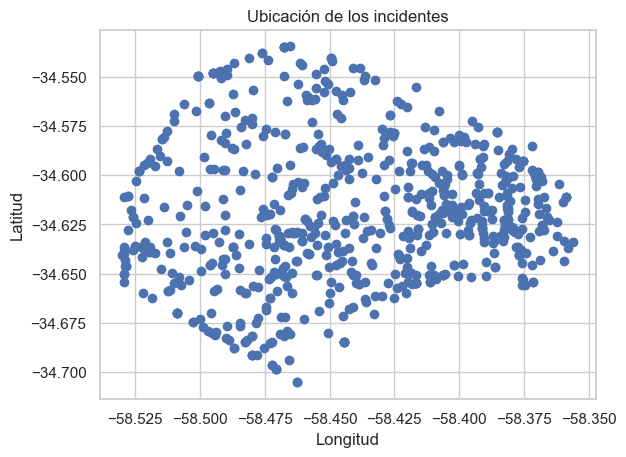

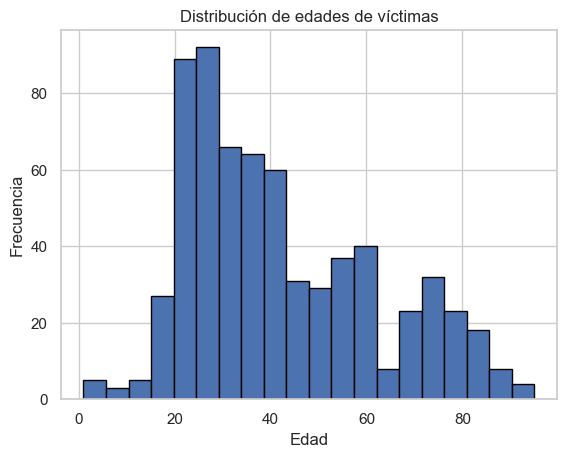

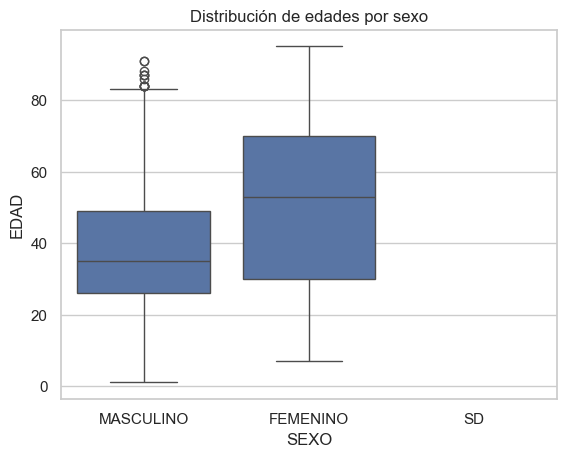

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame se llama df

# Gráfico de barras para contar la cantidad de víctimas por año
sns.countplot(x='AAAA', data=df)
plt.title('Número de víctimas por año')
plt.show()

# Gráfico de barras para contar la cantidad de víctimas por mes
sns.countplot(x='MM', data=df)
plt.title('Número de víctimas por mes')
plt.show()

# Gráfico de barras para contar la cantidad de víctimas por día de la semana
sns.countplot(x='DIA', data=df)
plt.title('Número de víctimas por día de la semana')
plt.show()

# Gráfico de barras para contar la cantidad de víctimas por hora
sns.countplot(x='HH', data=df)
plt.title('Número de víctimas por hora')
plt.show()

# Gráfico de dispersión para visualizar la relación entre la longitud y la latitud
plt.scatter(df['LONGITUD'], df['LATITUD'])
plt.title('Ubicación de los incidentes')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# Histograma de edades de víctimas
plt.hist(df['EDAD'], bins=20, edgecolor='black')
plt.title('Distribución de edades de víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot para visualizar la distribución de edades por sexo
sns.boxplot(x='SEXO', y='EDAD', data=df)
plt.title('Distribución de edades por sexo')
plt.show()


In [56]:
# Configurar el estilo de seaborn para hacer los gráficos más atractivos
sns.set(style="whitegrid")

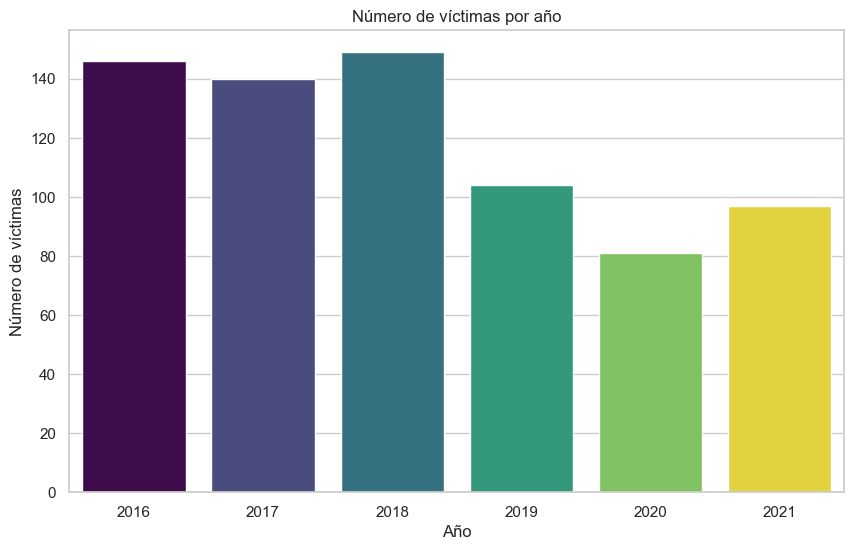

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AAAA', data=df, hue='AAAA', palette='viridis', legend=False)
plt.title('Número de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Número de víctimas')
plt.show()

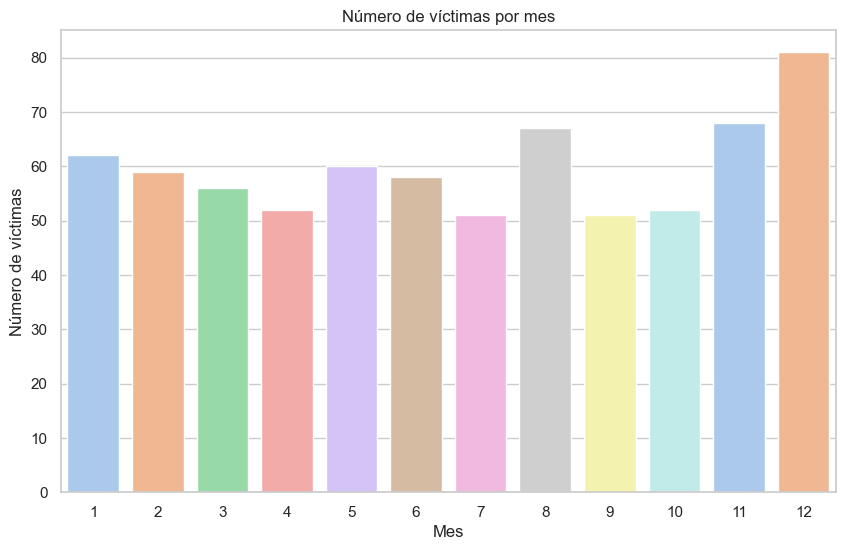

In [58]:
# Gráfico de barras para contar la cantidad de víctimas por mes
plt.figure(figsize=(10, 6))
sns.countplot(x='MM', data=df, palette='pastel', hue='MM', legend=False)
plt.title('Número de víctimas por mes')
plt.xlabel('Mes')
plt.ylabel('Número de víctimas')
plt.show()


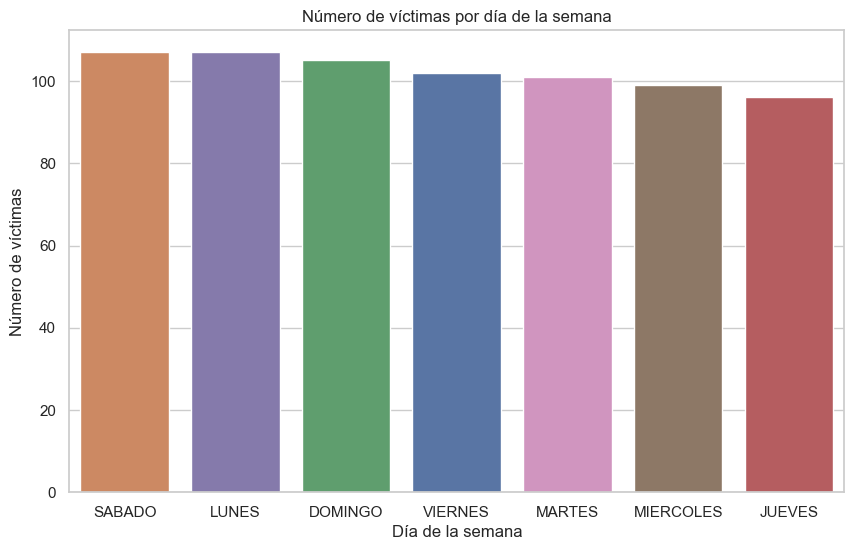

In [59]:

# Gráfico de barras para contar la cantidad de víctimas por día de la semana
plt.figure(figsize=(10, 6))
sns.countplot(x='DIA', data=df, order=df['DIA'].value_counts().index, palette='deep', hue='DIA', legend=False)
plt.title('Número de víctimas por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de víctimas')
plt.show()


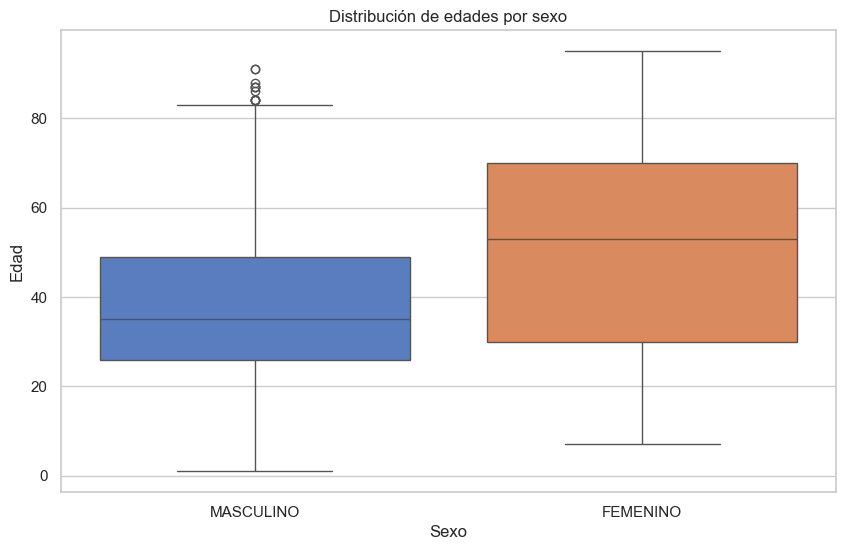

In [60]:

# Boxplot para visualizar la distribución de edades por sexo
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEXO', y='EDAD', data=df[df['SEXO']!="SD"], palette='muted', hue='SEXO', legend=False)
plt.title('Distribución de edades por sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')
plt.show()



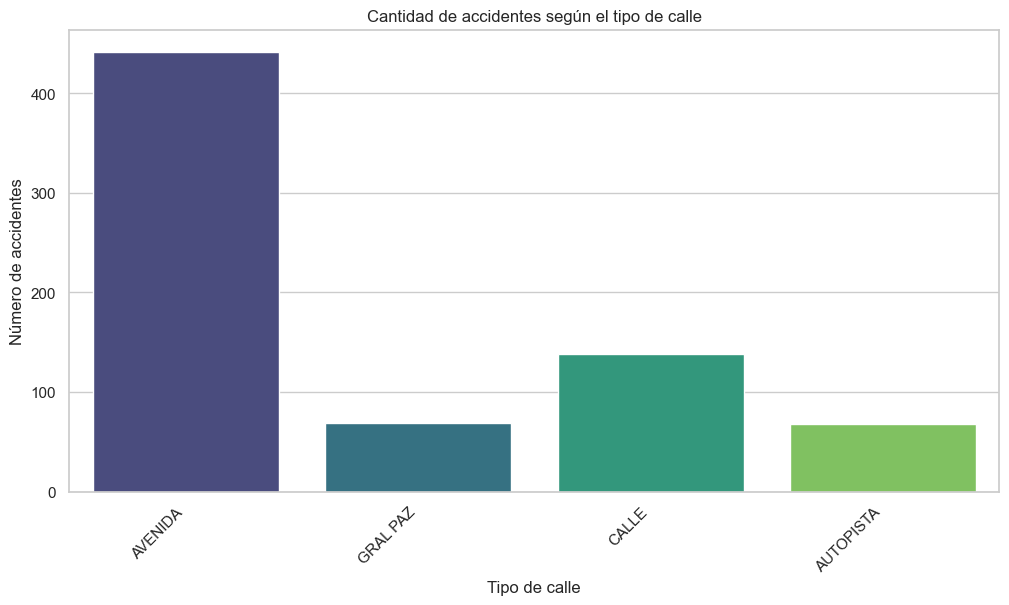

In [62]:
# Gráfico de barras para contar la cantidad de accidentes según el tipo de calle
plt.figure(figsize=(12, 6))
sns.countplot(x='TIPO_DE_CALLE', data=df, palette='viridis', hue='TIPO_DE_CALLE', legend=False)
plt.title('Cantidad de accidentes según el tipo de calle')
plt.xlabel('Tipo de calle')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

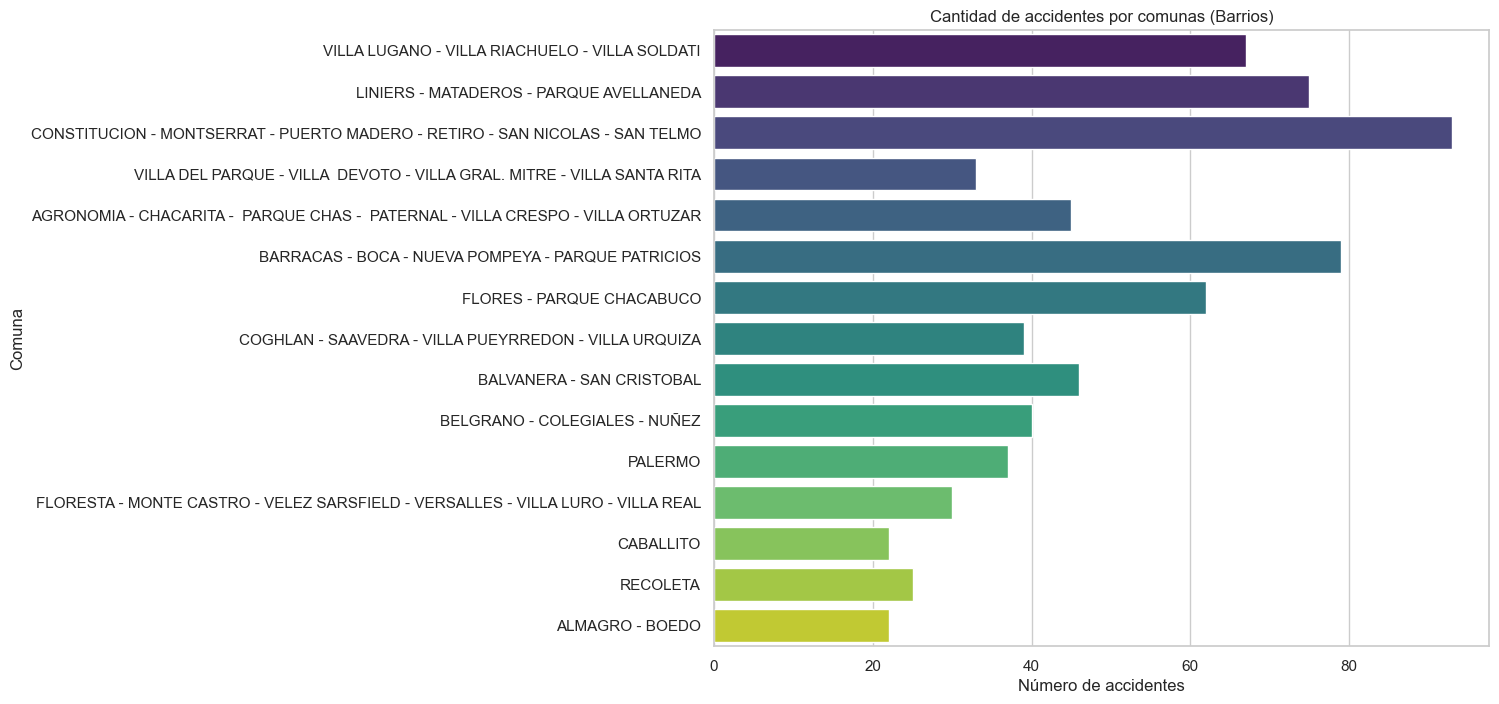

In [71]:
plt.figure(figsize=(10, 8))
sns.countplot(y='BARRIOS', data=df, palette='viridis',hue='BARRIOS', legend=False)
plt.title('Cantidad de accidentes por comunas (Barrios)')
plt.xlabel('Número de accidentes')
plt.ylabel('Comuna')
plt.show()

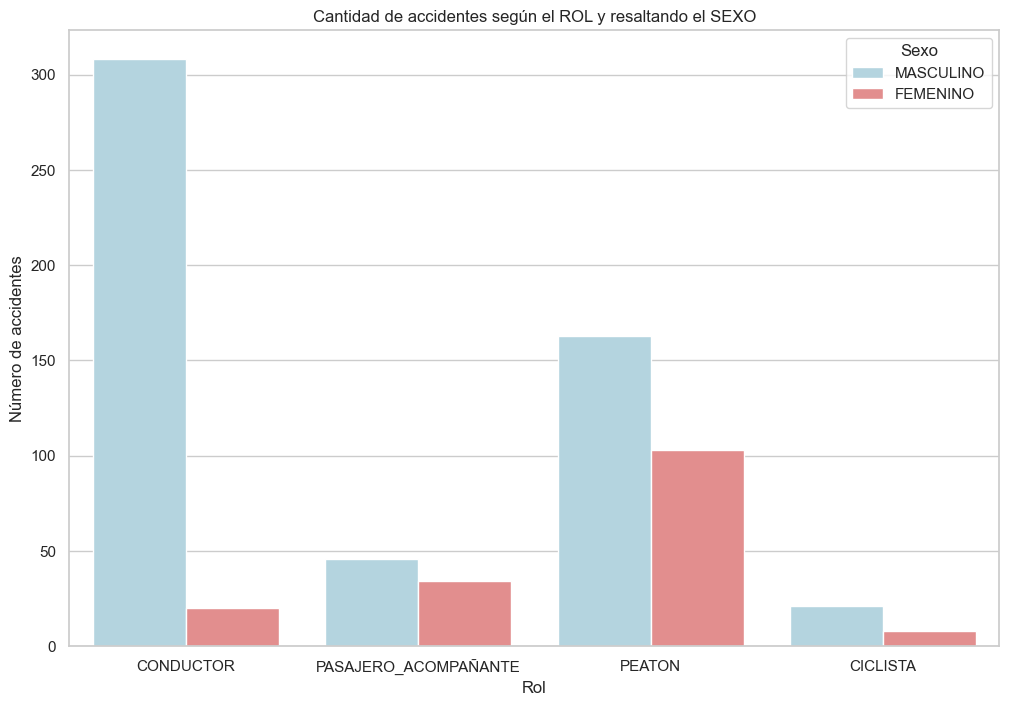

In [77]:
# Definir una paleta personalizada con colores celestes y rosas
custom_palette = {'MASCULINO': 'lightblue', 'FEMENINO': 'lightcoral'}

# Gráfico de barras para contar la cantidad de accidentes según el ROL y resaltando el SEXO
plt.figure(figsize=(12, 8))
sns.countplot(x='ROL', hue='SEXO', data=df[(df['SEXO']!="SD") & (df['ROL']!="SD") ], palette=custom_palette)
plt.title('Cantidad de accidentes según el ROL y resaltando el SEXO')
plt.xlabel('Rol')
plt.ylabel('Número de accidentes')
plt.legend(title='Sexo', loc='upper right')  # Agregar leyenda para el sexo
plt.show()

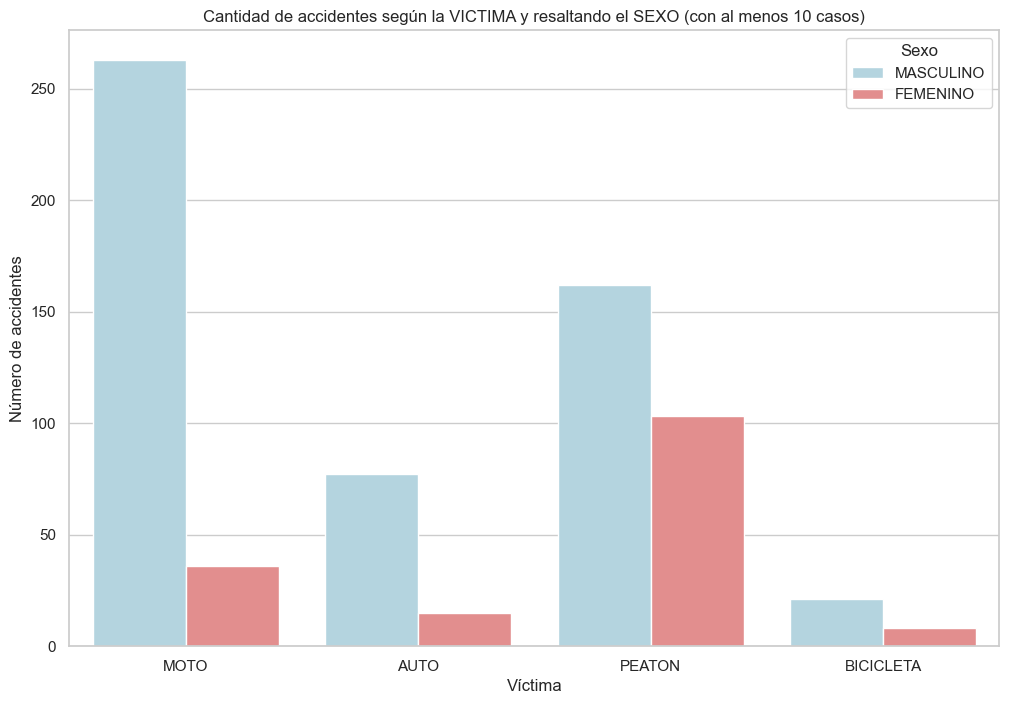

In [83]:
# Definir una paleta personalizada con colores celestes y rosas
custom_palette = {'MASCULINO': 'lightblue', 'FEMENINO': 'lightcoral'}

# Filtrar el DataFrame para incluir solo tipos de víctimas con al menos 10 casos
victimas_con_suficientes_casos = df['VICTIMA'].value_counts()[df['VICTIMA'].value_counts() >= 10].index

# Filtrar el DataFrame original
df_filtrado = df[(df['SEXO'] != "SD") & (df['VICTIMA'] != "SD") & (df['VICTIMA'].isin(victimas_con_suficientes_casos))]

# Gráfico de barras para contar la cantidad de accidentes según la VICTIMA y resaltando el SEXO
plt.figure(figsize=(12, 8))
sns.countplot(x='VICTIMA', hue='SEXO', data=df_filtrado, palette=custom_palette)
plt.title('Cantidad de accidentes según la VICTIMA y resaltando el SEXO (con al menos 10 casos)')
plt.xlabel('Víctima')
plt.ylabel('Número de accidentes')
plt.legend(title='Sexo', loc='upper right')  # Agregar leyenda para el sexo
plt.show()


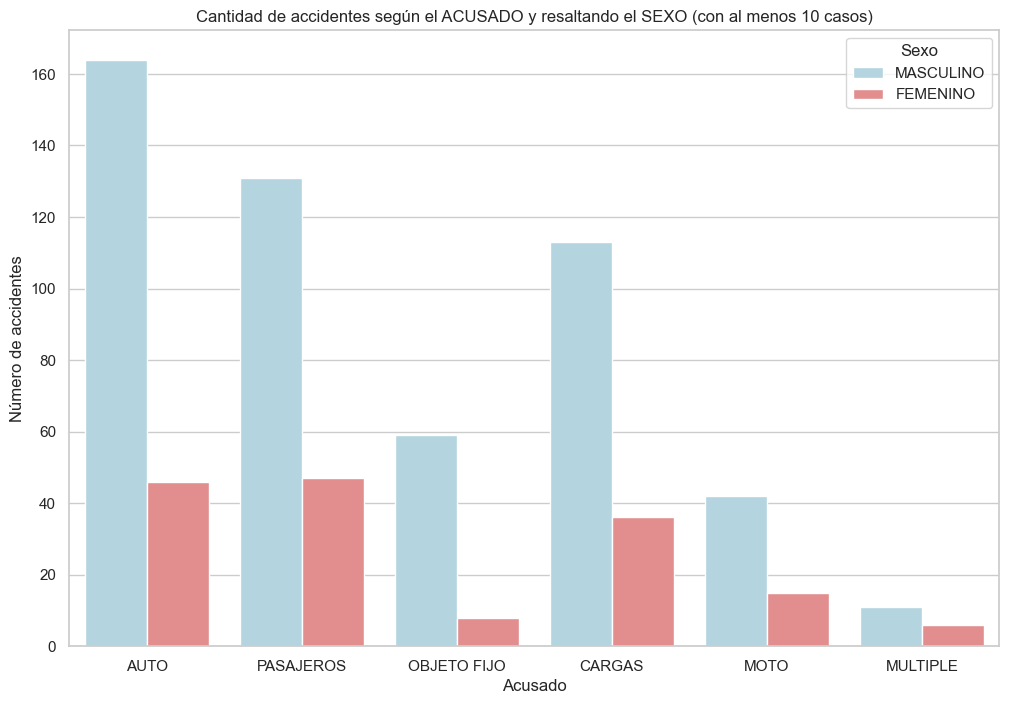

In [85]:
# Definir una paleta personalizada con colores celestes y rosas
custom_palette = {'MASCULINO': 'lightblue', 'FEMENINO': 'lightcoral'}

# Filtrar el DataFrame para incluir solo valores de 'ACUSADO' con al menos 10 casos
acusados_con_suficientes_casos = df['ACUSADO'].value_counts()[df['ACUSADO'].value_counts() >= 10].index

# Filtrar el DataFrame original
df_filtrado = df[(df['SEXO'] != "SD") & (df['ACUSADO'] != "SD") & (df['ACUSADO'].isin(acusados_con_suficientes_casos))]

# Gráfico de barras para contar la cantidad de accidentes según el ACUSADO y resaltando el SEXO
plt.figure(figsize=(12, 8))
sns.countplot(x='ACUSADO', hue='SEXO', data=df_filtrado, palette=custom_palette)
plt.title('Cantidad de accidentes según el ACUSADO y resaltando el SEXO (con al menos 10 casos)')
plt.xlabel('Acusado')
plt.ylabel('Número de accidentes')
plt.legend(title='Sexo', loc='upper right')  # Agregar leyenda para el sexo
plt.show()



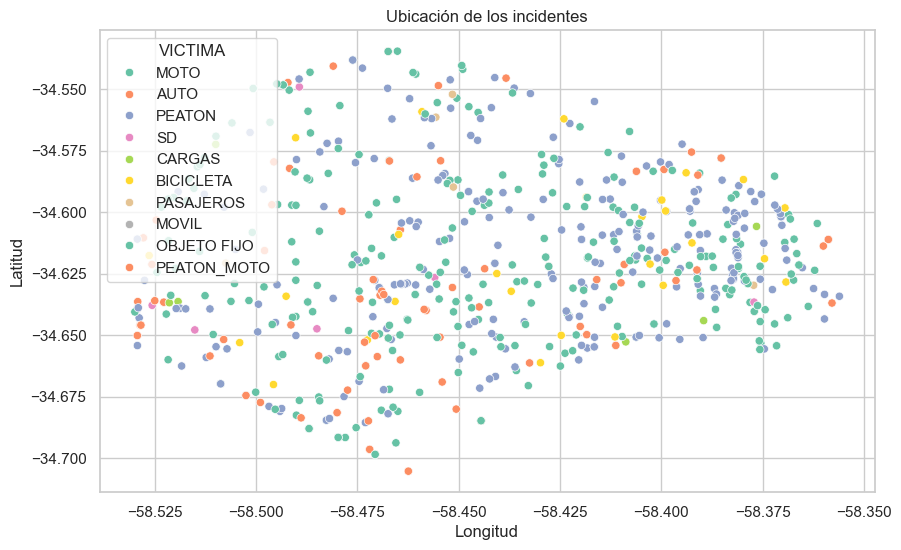

In [30]:
# Gráfico de dispersión para visualizar la relación entre la longitud y la latitud
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUD', y='LATITUD', data=df, hue='VICTIMA', palette='Set2')
plt.title('Ubicación de los incidentes')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [19]:
df[~df['LATITUD'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,SEMESTRE,MM,DD,ASPO,HH,DIA,...,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,RANGO_ETARIO,BARRIOS,AREA
0,2016-0001,1,2016-01-01,2016,1,1,1,ANTES,4.0,VIERNES,...,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,2016-01-01,JOVENES,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,2.221690e+07
1,2016-0002,1,2016-01-02,2016,1,1,2,ANTES,1.0,SABADO,...,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,2016-01-02,A_MAYORES,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07
2,2016-0003,1,2016-01-03,2016,1,1,3,ANTES,7.0,DOMINGO,...,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,2016-01-03,ADULTOS,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
3,2016-0004,1,2016-01-10,2016,1,1,10,ANTES,0.0,DOMINGO,...,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18.0,2016-01-10,JOVENES,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,2.221690e+07
4,2016-0005,1,2016-01-21,2016,1,1,21,ANTES,5.0,JUEVES,...,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29.0,2016-02-01,JOVENES,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,1.779457e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,12,13,DESPUES,17.0,LUNES,...,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18.0,2021-12-18,JOVENES,FLORES - PARQUE CHACABUCO,1.242290e+07
713,2021-0094,1,2021-12-20,2021,12,12,20,DESPUES,1.0,LUNES,...,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43.0,2021-12-20,ADULTOS,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07
714,2021-0095,1,2021-12-30,2021,12,12,30,DESPUES,0.0,JUEVES,...,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27.0,2022-01-02,JOVENES,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....,1.412004e+07
715,2021-0096,1,2021-12-15,2021,12,12,15,DESPUES,10.0,MIERCOLES,...,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60.0,2021-12-20,ADULTOS,LINIERS - MATADEROS - PARQUE AVELLANEDA,1.650531e+07


In [20]:
import folium
from folium.plugins import MarkerCluster

# Suponiendo que tu DataFrame se llama df y tiene las columnas 'LATITUD' y 'LONGITUD'
# Puedes ajustar según la estructura real de tus datos

# Eliminar filas con valores NaN en 'LATITUD' o 'LONGITUD'
df_cleaned = df[~df['LATITUD'].isna()]

# Crear un mapa centrado en la primera ubicación en el DataFrame limpio
mapa = folium.Map(location=[df_cleaned['LATITUD'].iloc[0], df_cleaned['LONGITUD'].iloc[0]], zoom_start=12)

# Agregar marcadores al mapa
marker_cluster = MarkerCluster().add_to(mapa)

for index, row in df_cleaned.iterrows():
        folium.Marker([row['LATITUD'], row['LONGITUD']],
                      popup=f"ID: {row['ID']}, Víctima: {row['VICTIMA']}",
                      icon=folium.Icon(color='red')).add_to(marker_cluster)

# Guardar el mapa como un archivo HTML o mostrarlo en el notebook
mapa.save('ubicacion_incidentes.html')